In [ ]:
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade geopandas

In [14]:
%matplotlib inline
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
!wget https://www.gis-support.pl/downloads/Wojewodztwa.zip
!unzip Wojewodztwa.zip

--2023-01-03 07:32:06--  https://www.gis-support.pl/downloads/Wojewodztwa.zip
Resolving www.gis-support.pl (www.gis-support.pl)... 185.135.90.37
Connecting to www.gis-support.pl (www.gis-support.pl)|185.135.90.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5514600 (5.3M) [application/zip]
Saving to: ‘Wojewodztwa.zip’

Wojewodztwa.zip     100%[===================>]   5.26M  5.19MB/s    in 1.0s    

2023-01-03 07:32:07 (5.19 MB/s) - ‘Wojewodztwa.zip’ saved [5514600/5514600]

Archive:  Wojewodztwa.zip
 extracting: Wojewвdztwa.cpg        
  inflating: Wojewвdztwa.dbf        
  inflating: Wojewвdztwa.prj        
  inflating: Wojewвdztwa.shp        
  inflating: Wojewвdztwa.shx        


In [21]:
voivodeships = geopandas.read_file('Wojewвdztwa.shx')
voivodeships.head(5)

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,WOJ,24,śląskie,None,0,2017-10-10,None,2012-09-26,None,None,...,24,None,None,UZG,0,1331323,None,12.136952,1.557335,"MULTIPOLYGON (((494179.526 358814.295, 494173...."
1,WOJ,16,opolskie,None,0,2017-10-10,None,2012-09-26,None,None,...,16,None,None,UZG,0,1331326,None,9.005207,1.196205,"POLYGON ((417001.841 369554.248, 417005.901 36..."
2,WOJ,26,świętokrzyskie,None,0,2012-09-26,None,2012-09-26,None,None,...,26,None,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((549668.108 320839.847, 549676.668 32..."
3,WOJ,22,pomorskie,None,0,2020-04-09,None,2012-09-26,None,None,...,22,None,None,UZG,0,1358902,None,13.167595,2.520630,"POLYGON ((414159.332 769636.478, 414269.395 76..."
4,WOJ,20,podlaskie,None,0,2019-03-21,None,2012-09-26,None,None,...,20,None,None,UZG,0,1353685,None,11.101166,2.718484,"POLYGON ((700075.252 572284.982, 700055.491 57..."


In [26]:
voivodeships_clean = voivodeships[['JPT_NAZWA_', 'geometry']]

In [ ]:
voivodeships_clean['centroid'] = voivodeships_clean.centroid

In [16]:
locations = pd.read_csv('https://raw.githubusercontent.com/bartlomiejremlein/analiza-parkrun-polska/main/data/locations.csv')
locations.head()

,name,short_name,latitude,longitude,state,location
0,gdynia,Gdynia,54.502632,18.558699,pomorskie,Gdynia
1,gdansk,Gdańsk,54.414280,18.601700,pomorskie,Gdańsk
2,lodz,Łódź,51.752244,19.441498,łódzkie,Łódź
3,poznan,Poznań,52.418883,16.933289,wielkopolskie,Poznań
4,warszawapraga,Warszawa-Praga,52.241493,21.050963,mazowieckie,Warszawa


In [28]:
locations_by_state = pd.DataFrame(locations.groupby('state').count()['location']).reset_index()
locations_by_state['bin'] = pd.cut(locations_by_state['location'], bins = [0, 5, 10, 15], precision=0, labels=['1-5', '6-10', '11-15'])
locations_by_state.head()

,state,location,bin
0,dolnośląskie,6,6-10
1,kujawsko-pomorskie,4,1-5
2,lubelskie,3,1-5
3,lubuskie,3,1-5
4,mazowieckie,10,6-10


In [29]:
merged_locations = voivodeships_clean.merge(locations_by_state, how='left', left_on='JPT_NAZWA_', right_on='state')
merged_locations.head(5)

,JPT_NAZWA_,geometry,centroid,state,location,bin
0,śląskie,"MULTIPOLYGON (((494179.526 358814.295, 494173....",POINT (499481.113 273446.549),śląskie,6.0,6-10
1,opolskie,"POLYGON ((417001.841 369554.248, 417005.901 36...",POINT (422175.325 309357.720),opolskie,2.0,1-5
2,świętokrzyskie,"POLYGON ((549668.108 320839.847, 549676.668 32...",POINT (624746.836 323304.070),NaN,NaN,NaN
3,pomorskie,"POLYGON ((414159.332 769636.478, 414269.395 76...",POINT (433921.270 699374.248),pomorskie,11.0,11-15
4,podlaskie,"POLYGON ((700075.252 572284.982, 700055.491 57...",POINT (761999.593 606650.468),podlaskie,2.0,1-5


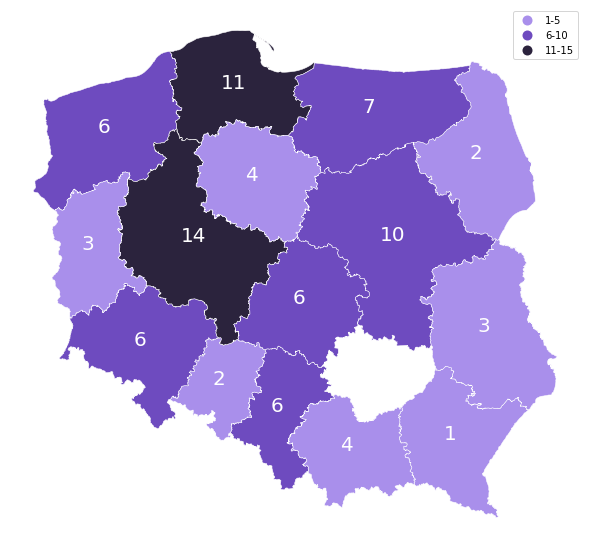

In [30]:
my_cmap = ListedColormap(["#a98feb", "#6e4bbf", "#2B233D"], name="my_cmap")

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
merged_locations.plot(ax=ax, column='bin', legend=True,  cmap=my_cmap, edgecolor='white', linewidth=0.5)
texts = []

labels = [str(num).split(".")[0] for num in list(merged_locations["location"])]

for x, y, label in zip(merged_locations.centroid.x, merged_locations.centroid.y, labels):
    plt.text(x-15000, y, label, fontsize = 20, color="white", fontweight="light")
    
plt.savefig('woj.png', dpi=300)